In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Ex 5

In [2]:
Q_A = 600
Q_B = 1200
Q_C = 2400
Q_max = 2*Q_C

v_max=60
v_C = 12

In [3]:
#Q1-3

In [4]:
k_cri = Q_max/v_max
k_C = Q_C/v_C
w = (Q_max-Q_C)/(k_C - k_cri)
print('w',w)
k_max = Q_max/w + k_cri

w 20.0


In [5]:
Q_D = 3000
k_D = Q_D/v_max
v_onde = (Q_C-Q_D)/(k_C-k_D)
print('v_onde ',v_onde, 'km/h')

v_onde  -4.0 km/h


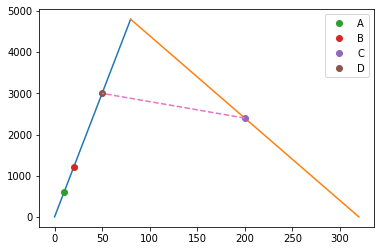

In [6]:
plt.figure()
plt.plot([0,k_cri],[0,Q_max])
plt.plot([k_cri, k_max],[Q_max,0])
plt.plot(Q_A/v_max, Q_A, 'o', label='A')
plt.plot(Q_B/v_max, Q_B, 'o', label='B')
plt.plot(k_C, Q_C, 'o', label='C')
plt.plot(k_D, Q_D, 'o', label='D')
plt.plot([k_C,k_D], [Q_C,Q_D],'--')
plt.legend()

In [7]:
#Q4-7

In [8]:
T2 = [0,5,8,24,29,37]
Q2 = [600, 1200, 3000, 2400, 600,600]
l12 = 1

In [9]:
t12 = l12/v_max
print(t12)

T1 = [t+t12*60 for t in T2]
Q1_D = Q2

0.016666666666666666


In [10]:
nb_pts = len(T1)
N1 = np.zeros(nb_pts)
N2 = np.zeros(nb_pts)

for i in range(1,nb_pts):
    N1[i] = N1[i-1] + Q1_D[i-1]*(T1[i]-T1[i-1])/60
    N2[i] = N2[i-1] + Q2[i-1]*(T2[i]-T2[i-1])/60

In [11]:
dt_reprise = (Q_D-Q_C)*(T1[3]-T1[2])/(Q_C-Q2[4])
print(dt_reprise)

5.333333333333333


In [12]:
N_max = (T1[3]-T1[2])/60*(Q_D-Q_C)
print(N_max)

160.0


In [13]:
TT = 1/2*N_max*(T1[3]-T1[2])+N_max*(T1[4]-T1[3])+N_max*dt_reprise*1/2
print(TT, 'min =', TT/60, 'h')

2506.6666666666665 min = 41.77777777777778 h


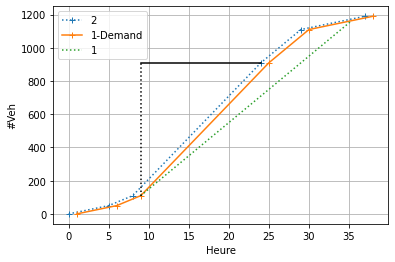

In [14]:
plt.figure()
plt.plot(T2,N2,'+:', label='2')
plt.plot(T1,N1,'+-', label='1-Demand')
plt.plot([T1[2], T1[2]+dt_reprise+21], [N1[2], N1[2]+(dt_reprise+(T1[4]-T1[2]))/60*Q_max/2], ':', label='1')

plt.plot([T1[2],T2[3]], [N2[3]]*2, 'k')
plt.plot([T1[2]]*2, [N1[2],N2[3]], ':k')
plt.legend()
plt.xlabel('Heure')
plt.ylabel('#Veh')
plt.grid()

In [15]:
v_onde = l12/((T2[3]-T1[2])/60)
print(v_onde, ' km/h')

4.0  km/h


# Ex 6

In [24]:
Q_max = 6000
Q_D = 5500 # demand
Q_inc = 1/3*Q_max
t1 = 11
t2 = 20
t_inc = 12
dt_int = 1

In [17]:
#Q2
N_max = dt_int*(Q_D-Q_inc)
print('Nb max de vehicules ', N_max)

Nb max de vehicules  1750.0


In [18]:
#Q3
T_cong = dt_int + N_max/(Q_max-Q_D)
print('Temps de congestion (h) ', T_cong)

Temps de congestion (h)  4.0


In [19]:
#Q4
TT = 1/2*N_max*(dt_int+(T_cong-dt_int))
print('Temps total perdu (veh.h) ', TT)

Temps total perdu (veh.h)  3500.0


In [20]:
#Q5 
N_tot = Q_D*T_cong
print('Nb total de vehicules ', N_tot)
print('Nb personnes ', 3*N_tot)

Nb total de vehicules  22000.0
Nb personnes  66000.0


In [21]:
#Q6
T_m = TT/N_tot
print('Retard moyen (min) ',np.round(T_m*60,2))

Retard moyen (min)  9.55


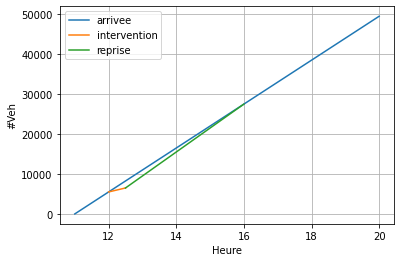

In [23]:
plt.figure()
# Demand
plt.plot([t1,t2], [0, (t2-t1)*Q_D], label='arrivee')
# Pendant intervention
plt.plot([t_inc, t_inc+dt_int], [(t_inc-t1)*Q_D, (t_inc-t1)*Q_D+dt_int*Q_inc], label='intervention')
# Apres intervention
plt.plot([t_inc+dt_int, t_inc+T_cong], [(t_inc-t1)*Q_D+dt_int*Q_inc, (t_inc-t1)*Q_D+dt_int*Q_inc + (T_cong-dt_int)*Q_max],label='reprise')
plt.legend()
#plt.xlim([11,17])
plt.xlabel('Heure')
plt.ylabel('#Veh')
plt.grid()
